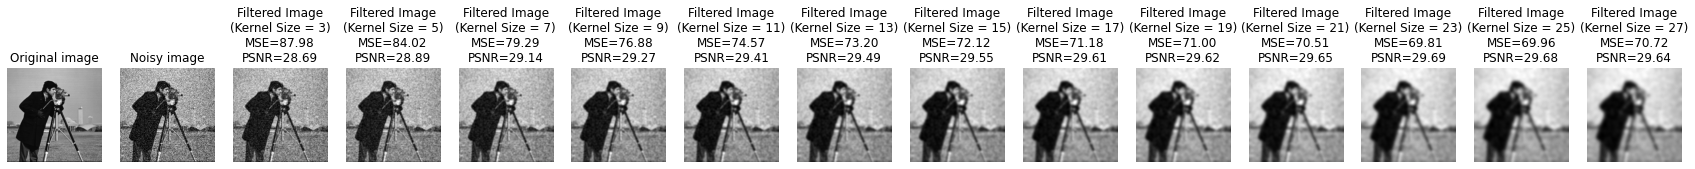

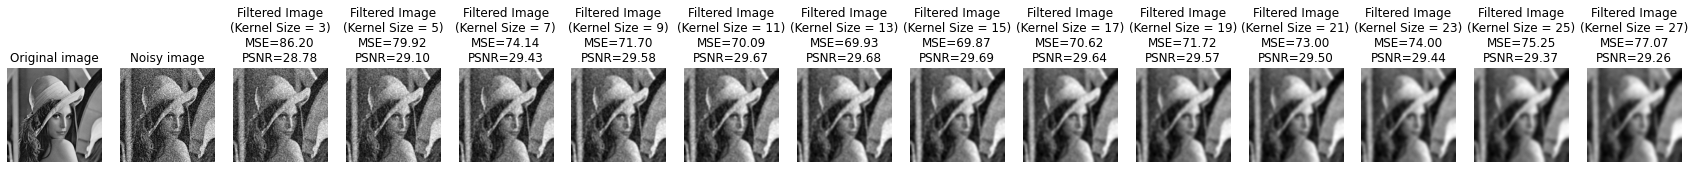

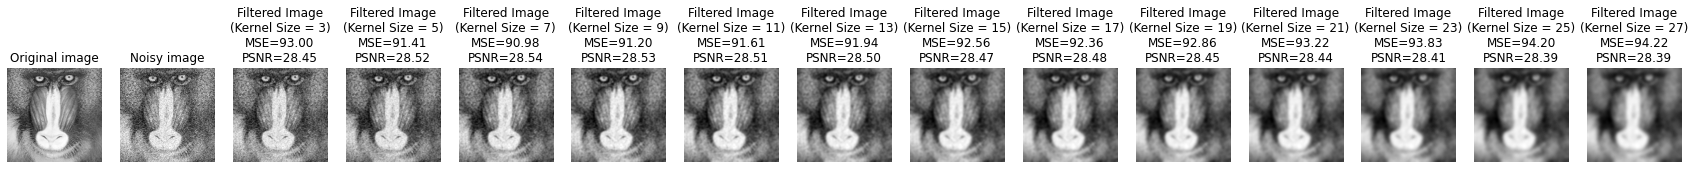

In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

images = ['caman.tif', 'lena.tif', 'baboon.bmp']
hist = {'caman.tif': {'mse': [],
                  'psnr': []},
        'lena.tif': {'mse': [],
                  'psnr': []},
        'baboon.bmp': {'mse': [],
                  'psnr': []}}

for image in images:
    plt.figure(figsize=(30, 20))
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(1, 15, 1)
    plt.title("Original image")
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    noise_sigma = 50
    noise = np.random.normal(loc=0, scale=noise_sigma, size=img.shape)
    noisy_img = np.clip(img.astype(np.int32) + noise, 0, 255).astype(np.uint8)

    plt.subplot(1, 15, 2)
    plt.title("Noisy image")
    plt.imshow(noisy_img, cmap='gray')
    plt.axis("off")

    kernel_sizes = [i for i in range(3, 28, 2)]
    for index, kernel_size in enumerate(kernel_sizes):
        filtered_img = cv2.GaussianBlur(noisy_img, (kernel_size, kernel_size), 0)

        mse = np.mean((filtered_img - img) ** 2)
        psnr = 10 * math.log10(255**2 / mse)

        hist[image]['mse'].append(mse)
        hist[image]['psnr'].append(psnr)
    
        plt.subplot(1, 15, index+3)
        plt.title(f"Filtered Image\n(Kernel Size = {kernel_size})\nMSE={mse:.2f}\nPSNR={psnr:.2f}") 
        plt.imshow(filtered_img, cmap='gray')
        plt.axis("off")

    plt.show()

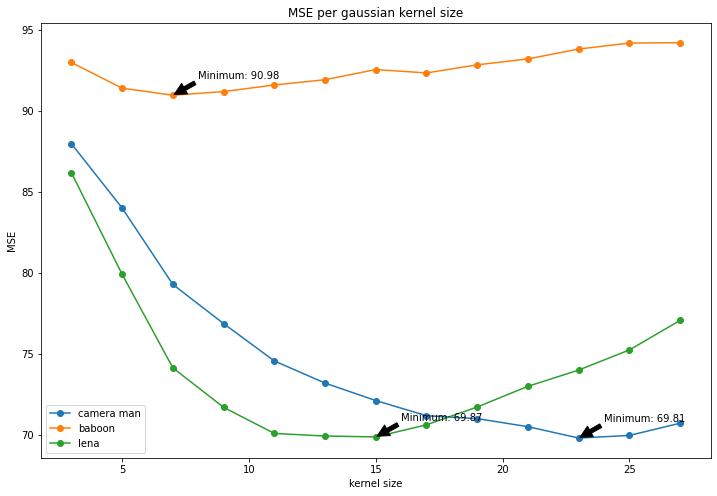

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(range(3, 28, 2), hist['caman.tif']['mse'], label='camera man', marker='o')
plt.plot(range(3, 28, 2), hist['baboon.bmp']['mse'], label='baboon', marker='o')
plt.plot(range(3, 28, 2), hist['lena.tif']['mse'], label='lena', marker='o')

minimum = min(hist['caman.tif']['mse'])
idx = hist['caman.tif']['mse'].index(minimum)*2+1
plt.annotate(f'Minimum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

minimum = min(hist['baboon.bmp']['mse'])
idx = hist['baboon.bmp']['mse'].index(minimum)*2+1
plt.annotate(f'Minimum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

minimum = min(hist['lena.tif']['mse'])
idx = hist['lena.tif']['mse'].index(minimum)*2+1
plt.annotate(f'Minimum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.xlabel('kernel size')
plt.ylabel('MSE')
plt.title('MSE per gaussian kernel size')
plt.show()

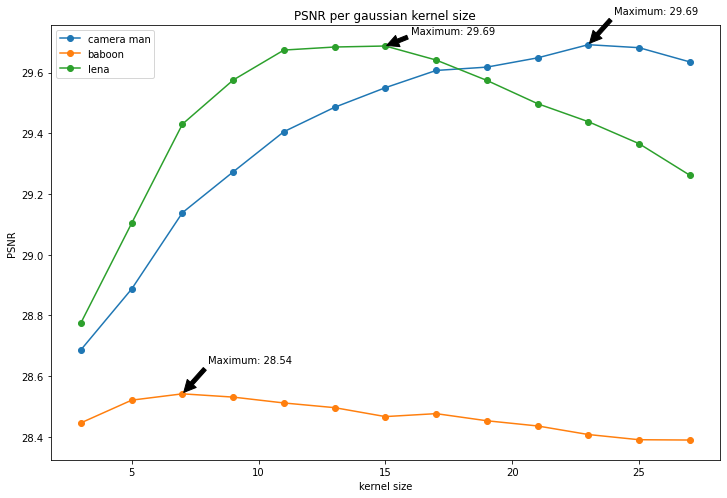

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(range(3, 28, 2), hist['caman.tif']['psnr'], label='camera man', marker='o')
plt.plot(range(3, 28, 2), hist['baboon.bmp']['psnr'], label='baboon', marker='o')
plt.plot(range(3, 28, 2), hist['lena.tif']['psnr'], label='lena', marker='o')

minimum = max(hist['caman.tif']['psnr'])
idx = hist['caman.tif']['psnr'].index(minimum)*2+1
plt.annotate(f'Maximum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

minimum = max(hist['baboon.bmp']['psnr'])
idx = hist['baboon.bmp']['psnr'].index(minimum)*2+1
plt.annotate(f'Maximum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

minimum = max(hist['lena.tif']['psnr'])
idx = hist['lena.tif']['psnr'].index(minimum)*2+1
plt.annotate(f'Maximum: {minimum:.2f}', xy=(idx+2, minimum),
             xytext=(idx + 3, minimum + 0.04),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.xlabel('kernel size')
plt.ylabel('PSNR')
plt.title('PSNR per gaussian kernel size')
plt.show()

In [20]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

sigmas = range(25, 301, 25)
hists = []

for noise_sigma in sigmas:
    images = ['caman.tif', 'lena.tif', 'baboon.bmp']
    hist = {'caman.tif': {'mse': [],
                    'psnr': []},
            'lena.tif': {'mse': [],
                    'psnr': []},
            'baboon.bmp': {'mse': [],
                    'psnr': []}}

    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        noise = np.random.normal(loc=0, scale=noise_sigma, size=img.shape)
        noisy_img = np.clip(img.astype(np.int32) + noise, 0, 255).astype(np.uint8)

        kernel_sizes = [i for i in range(3, 28, 2)]
        for index, kernel_size in enumerate(kernel_sizes):
            filtered_img = cv2.GaussianBlur(noisy_img, (kernel_size, kernel_size), 0)

            mse = np.mean((filtered_img - img) ** 2)
            psnr = 10 * math.log10(255**2 / mse)

            hist[image]['mse'].append(mse)
            hist[image]['psnr'].append(psnr)
    
    hists.append(hist)

In [23]:
#caman
caman_mse, caman_mse_index, caman_psnr, caman_psnr_index = [], [], [], []
lena_mse, lena_mse_index, lena_psnr, lena_psnr_index = [], [], [], []
baboon_mse, baboon_mse_index, baboon_psnr, baboon_psnr_index = [], [], [], []
for index, hist in enumerate(hists):
    caman_mse.append(min(hist['caman.tif']['mse']))
    caman_mse_index.append(hist['caman.tif']['mse'].index(caman_mse[index]) * 2 + 3)
    caman_psnr.append(max(hist['caman.tif']['psnr']))
    caman_psnr_index.append(hist['caman.tif']['psnr'].index(caman_psnr[index]) * 2 + 3)

    lena_mse.append(min(hist['lena.tif']['mse']))
    lena_mse_index.append(hist['lena.tif']['mse'].index(lena_mse[index]) * 2 + 3)
    lena_psnr.append(max(hist['lena.tif']['psnr']))
    lena_psnr_index.append(hist['lena.tif']['psnr'].index(lena_psnr[index]) * 2 + 3)

    baboon_mse.append(min(hist['baboon.bmp']['mse']))
    baboon_mse_index.append(hist['baboon.bmp']['mse'].index(baboon_mse[index]) * 2 + 3)
    baboon_psnr.append(max(hist['baboon.bmp']['psnr']))
    baboon_psnr_index.append(hist['baboon.bmp']['psnr'].index(baboon_psnr[index]) * 2 + 3)

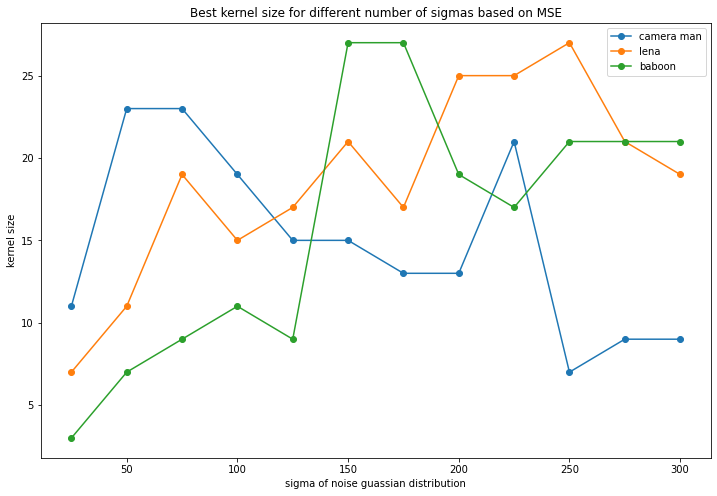

In [24]:
plt.figure(figsize=(12, 8))

plt.plot(sigmas, caman_mse_index, label='camera man', marker='o')
plt.plot(sigmas, lena_mse_index, label='lena', marker='o')
plt.plot(sigmas, baboon_mse_index, label='baboon', marker='o')

plt.legend()
plt.xlabel('sigma of noise guassian distribution')
plt.ylabel('kernel size')
plt.title('Best kernel size for different number of sigmas based on MSE')
plt.show()

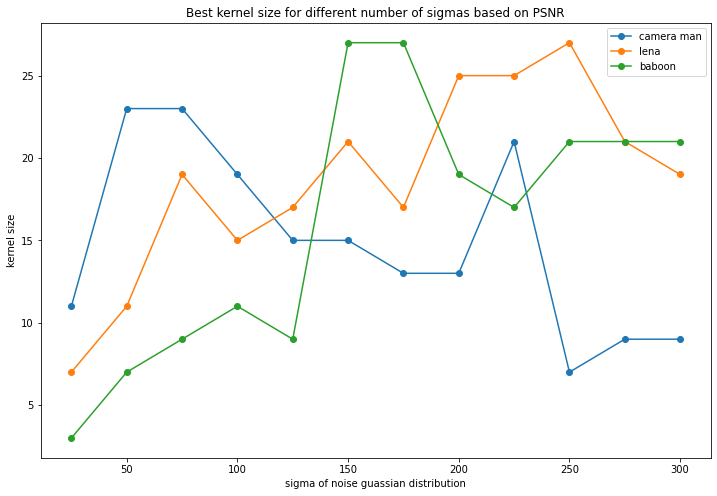

In [25]:
plt.figure(figsize=(12, 8))

plt.plot(sigmas, caman_psnr_index, label='camera man', marker='o')
plt.plot(sigmas, lena_psnr_index, label='lena', marker='o')
plt.plot(sigmas, baboon_psnr_index, label='baboon', marker='o')

plt.legend()
plt.xlabel('sigma of noise guassian distribution')
plt.ylabel('kernel size')
plt.title('Best kernel size for different number of sigmas based on PSNR')
plt.show()

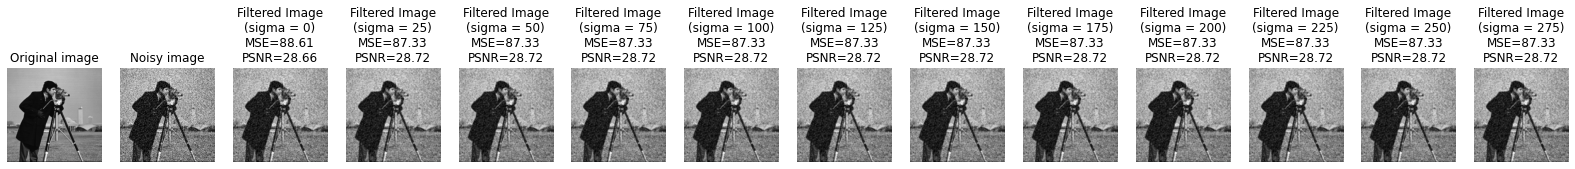

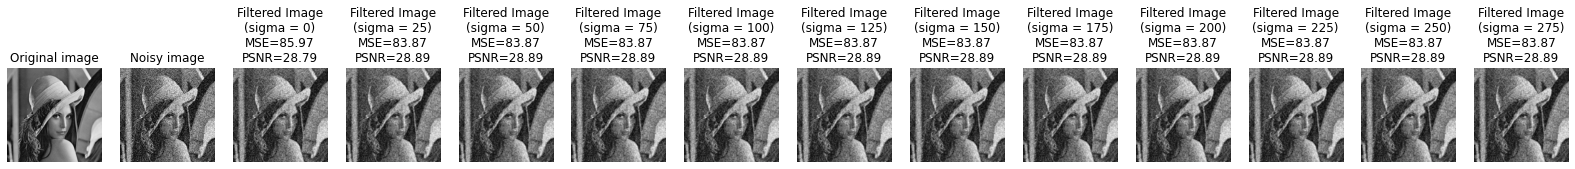

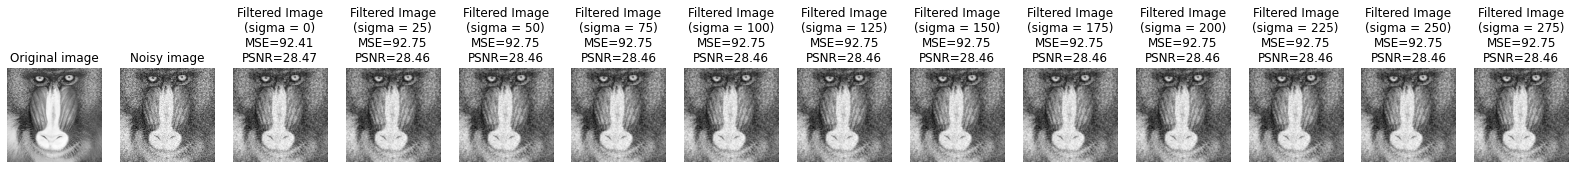

In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

images = ['caman.tif', 'lena.tif', 'baboon.bmp']
hist = {'caman.tif': {'mse': [],
                  'psnr': []},
        'lena.tif': {'mse': [],
                  'psnr': []},
        'baboon.bmp': {'mse': [],
                  'psnr': []}}

for image in images:
    plt.figure(figsize=(30, 20))
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(1, 15, 1)
    plt.title("Original image")
    plt.imshow(img, cmap='gray')
    plt.axis("off")

    noise_sigma = 50
    noise = np.random.normal(loc=0, scale=noise_sigma, size=img.shape)
    noisy_img = np.clip(img.astype(np.int32) + noise, 0, 255).astype(np.uint8)

    plt.subplot(1, 15, 2)
    plt.title("Noisy image")
    plt.imshow(noisy_img, cmap='gray')
    plt.axis("off")

    sigmas = [i for i in range(0, 300, 25)]
    for index, sigma in enumerate(sigmas):
        filtered_img = cv2.GaussianBlur(noisy_img, (3, 3), sigma)

        mse = np.mean((filtered_img - img) ** 2)
        psnr = 10 * math.log10(255**2 / mse)

        hist[image]['mse'].append(mse)
        hist[image]['psnr'].append(psnr)
    
        plt.subplot(1, 15, index+3)
        plt.title(f"Filtered Image\n(sigma = {sigma})\nMSE={mse:.2f}\nPSNR={psnr:.2f}") 
        plt.imshow(filtered_img, cmap='gray')
        plt.axis("off")

    plt.show()